<a href="https://colab.research.google.com/github/mohamedafdailat/datadriven/blob/main/bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.signal import hilbert
import matplotlib.pyplot as plt

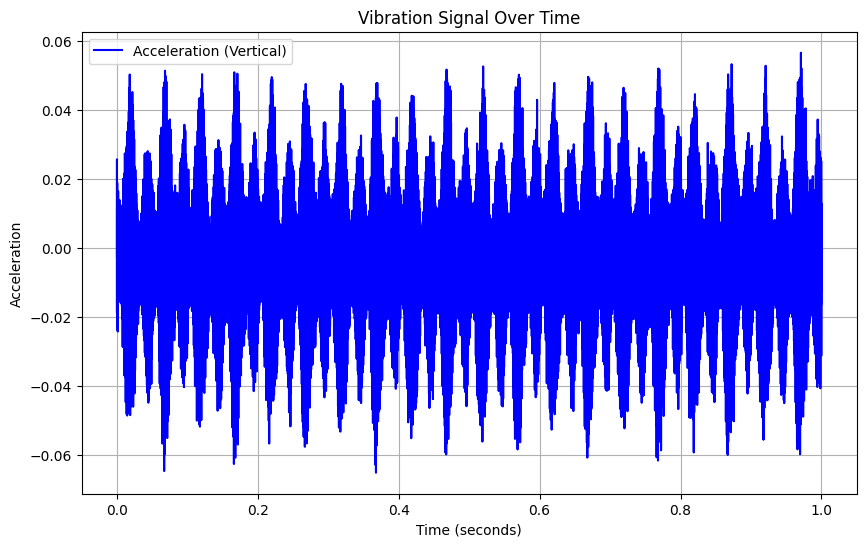

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path (update this to your actual file path)
file_path = "/content/file2.xlsx"

# Read the Excel file using the 'openpyxl' engine
df = pd.read_excel(file_path, engine="openpyxl", keep_default_na=False)

# Extract the 'acceleration_vert' column as a NumPy array
acceleration_vert = df["acceleration_vert"].to_numpy()

# Fréquence d'échantillonnage
sampling_freq = 25600  # Hz

# Créer l'axe temporel
time = np.arange(len(acceleration_vert)) / sampling_freq

# Tracer le signal d'accélération en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration_vert, label='Acceleration (Vertical)', color='blue')
plt.title("Vibration Signal Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration")
plt.grid(True)
plt.legend()
plt.show()

In [85]:
# Installer les dépendances si nécessaire
!pip install openpyxl
!pip install plotly

# Importer les bibliothèques
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.signal import hilbert

# Charger les données Excel
file_path = "/content/file2.xlsx"  # Mettre à jour avec votre chemin
df = pd.read_excel(file_path, engine="openpyxl", keep_default_na=False)

# Fréquence d'échantillonnage
sampling_freq = 25600

# Créer la figure Plotly
fig = go.Figure()

# Boucle sur toutes les colonnes de données
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:  # Vérifier que la colonne contient des valeurs numériques
        acceleration_signal = df[col]

        # Appliquer la transformation de Hilbert pour obtenir l'enveloppe
        analytic_signal = hilbert(acceleration_signal)
        envelope = np.abs(analytic_signal)

        # Calcul de la FFT de l'enveloppe
        fft_envelope = np.fft.fft(envelope)
        freq = np.fft.fftfreq(len(envelope), d=1/sampling_freq)

        # Ajouter la trace au graphique
        fig.add_trace(
            go.Scatter(
                x=freq[:len(freq)//2],
                y=np.abs(fft_envelope)[:len(freq)//2],
                mode='lines',
                name=f"FFT - {col}",
                line=dict(width=1.5)
            )
        )

# Ajouter des labels et un titre
fig.update_layout(
    title="Spectre de Fréquence - Enveloppe du Signal",
    xaxis_title="Fréquence (Hz)",
    yaxis_title="Amplitude",
    xaxis=dict(range=[0, 5000]),  # Limiter la plage de fréquence
    template="plotly_white",
    showlegend=True
)

# Afficher le graphique
fig.show()

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path (update this to your actual file path)
file_path = "/content/file11.xlsx"

# Read the Excel file using the 'openpyxl' engine
df = pd.read_excel(file_path, engine="openpyxl", keep_default_na=False)

# Extract the 'acceleration_vert' column as a NumPy array
acceleration_vert = df["acceleration_vert"].to_numpy()

# Fréquence d'échantillonnage
sampling_freq = 25600  # Hz

# Créer l'axe temporel
time = np.arange(len(acceleration_vert)) / sampling_freq

# Tracer le signal d'accélération en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration_vert, label='Acceleration (Vertical)', color='blue')
plt.title("Vibration Signal Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration")
plt.grid(True)
plt.legend()
plt.show()

In [87]:
# Installer les dépendances si nécessaire
!pip install openpyxl
!pip install plotly

# Importer les bibliothèques
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.signal import hilbert

# Charger les données Excel
file_path = "/content/file11.xlsx"  # Mettre à jour avec votre chemin
df = pd.read_excel(file_path, engine="openpyxl", keep_default_na=False)

# Fréquence d'échantillonnage
sampling_freq = 25600

# Créer la figure Plotly
fig = go.Figure()

# Boucle sur toutes les colonnes de données
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:  # Vérifier que la colonne contient des valeurs numériques
        acceleration_signal = df[col]

        # Appliquer la transformation de Hilbert pour obtenir l'enveloppe
        analytic_signal = hilbert(acceleration_signal)
        envelope = np.abs(analytic_signal)

        # Calcul de la FFT de l'enveloppe
        fft_envelope = np.fft.fft(envelope)
        freq = np.fft.fftfreq(len(envelope), d=1/sampling_freq)

        # Ajouter la trace au graphique
        fig.add_trace(
            go.Scatter(
                x=freq[:len(freq)//2],
                y=np.abs(fft_envelope)[:len(freq)//2],
                mode='lines',
                name=f"FFT - {col}",
                line=dict(width=1.5)
            )
        )

# Ajouter des labels et un titre
fig.update_layout(
    title="Spectre de Fréquence - Enveloppe du Signal",
    xaxis_title="Fréquence (Hz)",
    yaxis_title="Amplitude",
    xaxis=dict(range=[0, 5000]),  # Limiter la plage de fréquence
    template="plotly_white",
    showlegend=True
)

# Afficher le graphique
fig.show()

Dans ce graphe on a trouvé une pic de fréquence qui valent 50 HZ qui est proche de 49.5 HZ de cele on déduit qu'on a un défaut interne

In [5]:
pip install python-calamine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.0/886.0 kB 9.5 MB/s eta 0:00:00


In [6]:
import os
import numpy as np
import pandas as pd

# Configuration
sampling_freq = 25600  # Fréquence d'échantillonnage (Hz)
data_paths = {
    'F0': '/content/data/F0_classe_def',     # Classe défectueuse
    'F1': '/content/data/F0_classe_saine'    # Classe saine
}

# Liste pour stocker les statistiques
results = []

# Fonction de chargement et de calcul
def load_and_analyze_datasets():
    for class_label, path in data_paths.items():
        for file in os.listdir(path):
            if file.endswith('.xlsx'):
                file_path = os.path.join(path, file)

                try:
                    df = pd.read_excel(file_path, engine='calamine')
                    df.columns = df.columns.str.strip().str.lower()

                    # Sélection de la première colonne numérique
                    col = df.select_dtypes(include=[np.number]).iloc[:, 0]

                    # Calcul des statistiques
                    rms = np.sqrt(np.mean(col ** 2))
                    skewness = col.skew()
                    kurtosis = col.kurt()
                    mean = col.mean()
                    max_val = col.max()

                    # Encodage classe numérique : 0 = sain (F1), 1 = défectueux (F0)
                    numeric_class = 0 if class_label == 'F1' else 1

                    results.append({
                        "Classe": class_label,
                        "Classe numérique": numeric_class,
                        "Fichier": file,
                        "Moyenne": mean,
                        "RMS": rms,
                        "Skewness": skewness,
                        "Kurtosis": kurtosis,
                        "Valeur Max": max_val
                    })

                except Exception as e:
                    print(f"❌ Erreur avec {file} : {e}")

# Lancement de l'analyse
load_and_analyze_datasets()

# Création du DataFrame de résultats
results_df = pd.DataFrame(results)

# Sauvegarde dans un fichier CSV
results_df.to_csv("resultats_statistiques.csv", index=False)

# Affichage de résumé
print("✅ Analyse terminée. Résultats sauvegardés dans 'resultats_statistiques.csv'.")
print("\nAperçu des résultats :")
print(results_df.head())

✅ Analyse terminée. Résultats sauvegardés dans 'resultats_statistiques.csv'.

Aperçu des résultats :
  Classe  Classe numérique       Fichier   Moyenne       RMS  Skewness  \
0     F0                 1  file269.xlsx  0.040551  0.138655  0.235057   
1     F0                 1  file382.xlsx  0.041491  0.120477  0.069756   
2     F0                 1  file151.xlsx  0.039546  0.139501  0.020543   
3     F0                 1  file375.xlsx  0.041027  0.122565  0.120421   
4     F0                 1  file420.xlsx  0.041407  0.121876  0.075157   

    Kurtosis  Valeur Max  
0  13.476795    1.502072  
1  11.792552    1.217458  
2  15.551595    1.400472  
3  13.327490    1.393398  
4  11.555937    1.322412  


In [17]:
# Spécifier le bon lecteur pour un fichier Excel
file_path = "/content/resultats_statistiques.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes pour vérifier
df.head()

Classe  Classe numérique       Fichier   Moyenne       RMS  Skewness  \
0     F0                 1  file269.xlsx  0.040551  0.138655  0.235057   
1     F0                 1  file382.xlsx  0.041491  0.120477  0.069756   
2     F0                 1  file151.xlsx  0.039546  0.139501  0.020543   
3     F0                 1  file375.xlsx  0.041027  0.122565  0.120421   
4     F0                 1  file420.xlsx  0.041407  0.121876  0.075157   

    Kurtosis  Valeur Max  
0  13.476795    1.502072  
1  11.792552    1.217458  
2  15.551595    1.400472  
3  13.327490    1.393398  
4  11.555937    1.322412

In [18]:
print("Dimensions du dataframe :", df.shape)

Dimensions du dataframe : (1077, 8)


In [19]:
print("Statistiques descriptives :\n", df.describe())

Statistiques descriptives :
        Classe numérique      Moyenne          RMS     Skewness     Kurtosis  \
count       1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean           0.514392     0.040454     0.145382     0.029944     7.015248   
std            0.500025     0.001647     0.015653     0.151033     7.714987   
min            0.000000     0.033757     0.108878    -0.531132    -0.829361   
25%            0.000000     0.039486     0.132318    -0.005822    -0.812690   
50%            1.000000     0.040551     0.149812    -0.004110    11.478165   
75%            1.000000     0.041500     0.159202     0.116088    14.244478   
max            1.000000     0.045192     0.162724     0.484590    20.748540   

        Valeur Max  
count  1077.000000  
mean      0.889902  
std       0.484895  
min       0.386547  
25%       0.399232  
50%       1.101283  
75%       1.355344  
max       1.805164  


In [20]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values[missing_values > 0])

Valeurs manquantes par colonne :
 Series([], dtype: int64)


In [21]:
# Remplacer les valeurs manquantes par la médiane de chaque colonne
df.fillna(df.median(numeric_only=True), inplace=True)

# Afficher le dataframe après traitement
print(df)

     Classe  Classe numérique       Fichier   Moyenne       RMS  Skewness  \
0        F0                 1  file269.xlsx  0.040551  0.138655  0.235057   
1        F0                 1  file382.xlsx  0.041491  0.120477  0.069756   
2        F0                 1  file151.xlsx  0.039546  0.139501  0.020543   
3        F0                 1  file375.xlsx  0.041027  0.122565  0.120421   
4        F0                 1  file420.xlsx  0.041407  0.121876  0.075157   
...     ...               ...           ...       ...       ...       ...   
1072     F1                 0   file50.xlsx  0.038585  0.157959 -0.003243   
1073     F1                 0   file64.xlsx  0.041610  0.159267 -0.005630   
1074     F1                 0  file487.xlsx  0.042816  0.157742 -0.003973   
1075     F1                 0  file398.xlsx  0.041879  0.161737 -0.004870   
1076     F1                 0  file193.xlsx  0.041356  0.158303 -0.006160   

       Kurtosis  Valeur Max  
0     13.476795    1.502072  
1     11.792552

In [24]:
print(df.isnull().sum())

Classe              0
Classe numérique    0
Fichier             0
Moyenne             0
RMS                 0
Skewness            0
Kurtosis            0
Valeur Max          0
dtype: int64


In [25]:
import joblib
from sklearn.preprocessing import MinMaxScaler


def normalisation(X):
    scaler = MinMaxScaler()
    normalized_X = scaler.fit_transform(X)
    joblib.dump(scaler, 'scaler.pkl')  # Sauvegarde du scaler
    return normalized_X

# Exemple d'utilisation
X = df.select_dtypes(include=["number"])  # Sélectionner uniquement les colonnes numériques
X_normalized = normalisation(X)  # Normaliser les données



In [26]:
import os

# Vérifier si scaler.pkl est présent
print("Fichier existe ?", os.path.exists("scaler.pkl"))


Fichier existe ? True


In [27]:
from google.colab import files

files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Supprimer la colonne Timestamp
df = df.drop(columns=["Fichier"])

# Sauvegarder la nouvelle version sans Timestamp
df.to_excel("data_sans_Fichier.xlsx", index=False)

# Vérifier que la colonne a bien été supprimée
print(df.head())


  Classe  Classe numérique   Moyenne       RMS  Skewness   Kurtosis  \
0     F0                 1  0.040551  0.138655  0.235057  13.476795   
1     F0                 1  0.041491  0.120477  0.069756  11.792552   
2     F0                 1  0.039546  0.139501  0.020543  15.551595   
3     F0                 1  0.041027  0.122565  0.120421  13.327490   
4     F0                 1  0.041407  0.121876  0.075157  11.555937   

   Valeur Max  
0    1.502072  
1    1.217458  
2    1.400472  
3    1.393398  
4    1.322412  


In [29]:
df.head()

Classe  Classe numérique   Moyenne       RMS  Skewness   Kurtosis  \
0     F0                 1  0.040551  0.138655  0.235057  13.476795   
1     F0                 1  0.041491  0.120477  0.069756  11.792552   
2     F0                 1  0.039546  0.139501  0.020543  15.551595   
3     F0                 1  0.041027  0.122565  0.120421  13.327490   
4     F0                 1  0.041407  0.121876  0.075157  11.555937   

   Valeur Max  
0    1.502072  
1    1.217458  
2    1.400472  
3    1.393398  
4    1.322412

In [31]:
# Supprimer la colonne Timestamp
df = df.drop(columns=["Classe"])

In [32]:
import matplotlib.pyplot as plt

#Coorelation de pearson : linéarité
correlation_matrix = df.corr()
correlation_matrix

Classe numérique   Moyenne       RMS  Skewness  Kurtosis  \
Classe numérique          1.000000  0.119373 -0.861302  0.222765  0.986101   
Moyenne                   0.119373  1.000000 -0.079150  0.024539  0.114097   
RMS                      -0.861302 -0.079150  1.000000  0.196193 -0.872098   
Skewness                  0.222765  0.024539  0.196193  1.000000  0.183502   
Kurtosis                  0.986101  0.114097 -0.872098  0.183502  1.000000   
Valeur Max                0.983749  0.115915 -0.810620  0.304118  0.981506   

                  Valeur Max  
Classe numérique    0.983749  
Moyenne             0.115915  
RMS                -0.810620  
Skewness            0.304118  
Kurtosis            0.981506  
Valeur Max          1.000000

<Axes: >

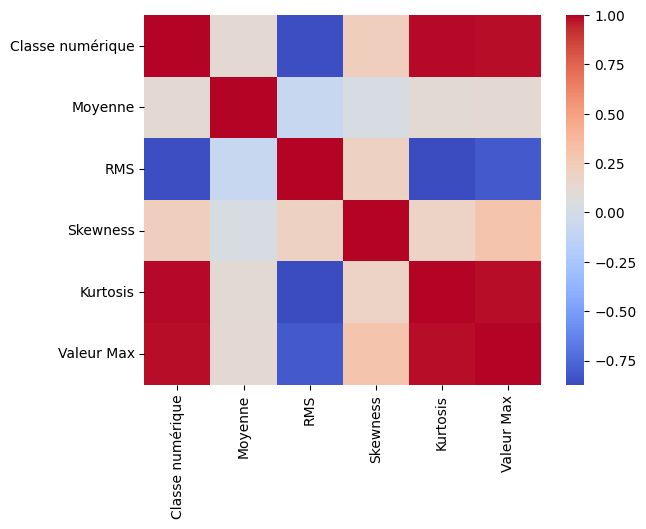

In [33]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

In [35]:
import matplotlib.pyplot as plt

target_column = 'Classe numérique'
if target_column in df.columns:
    class_counts = df[target_column].value_counts()
    print("\nDistribution des données :")
    print(class_counts)


Distribution des données :
Classe numérique
1    554
0    523
Name: count, dtype: int64


In [37]:
# Nouvelle stratégie de traitement des valeurs aberrantes
def treat_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:  # Uniquement les colonnes numériques
        # Calcul des bornes adaptatives
        q1 = df[col].quantile(0.10)
        q3 = df[col].quantile(0.90)
        iqr = q3 - q1

        # Bornes plus larges pour les distributions asymétriques
        lower_bound = q1 - 2.5 * iqr
        upper_bound = q3 + 2.5 * iqr

        # Calcul de la moyenne tronquée (plus robuste)
        trimmed_mean = df[col][(df[col] >= q1) & (df[col] <= q3)].mean()

        # Remplacement progressif
        mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        df.loc[mask, col] = np.nan
        df[col].fillna(trimmed_mean, inplace=True)

        # Transformation logarithmique pour la Skewness
        if col == 'Skewness':
            df[col] = np.log1p(df[col] - df[col].min() + 1e-6)  # Éviter les valeurs négatives

    return df

# Application du traitement
df_clean = treat_outliers(df.copy())

# Vérification
print("\nAprès traitement amélioré :")
outliers_final = detect_outliers_iqr(df_clean)
for col, outlier_df in outliers_final.items():
    print(f"{col}: {len(outlier_df)} valeurs aberrantes")

# Visualisation comparative
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x=df['Moyenne'], ax=axes[0,0], color='red')
axes[0,0].set_title('Moyenne avant traitement')

sns.boxplot(x=df_clean['Moyenne'], ax=axes[0,1], color='green')
axes[0,1].set_title('Moyenne après traitement')

sns.boxplot(x=df['Skewness'], ax=axes[1,0], color='red')
axes[1,0].set_title('Skewness avant traitement')

sns.boxplot(x=df_clean['Skewness'], ax=axes[1,1], color='green')
axes[1,1].set_title('Skewness après traitement')

plt.tight_layout()
plt.show()


Après traitement amélioré :
Classe numérique: 0 valeurs aberrantes
Moyenne: 2 valeurs aberrantes
RMS: 0 valeurs aberrantes
Skewness: 143 valeurs aberrantes
Kurtosis: 0 valeurs aberrantes
Valeur Max: 0 valeurs aberrantes


In [39]:
Y = df['Classe numérique']
X = df.drop(columns=['Classe numérique'])

In [40]:
X.shape

(1077, 5)

In [41]:
from sklearn.decomposition import PCA
import joblib

def reductionPCA(X, n_components):
    pca = PCA(n_components)
    data_reduced = pca.fit_transform(X)  # X est déjà normalisé
    joblib.dump(pca, 'pca.pkl')  # Sauvegarde du modèle PCA
    return data_reduced
X_pca = reductionPCA(X,5)  # Normaliser les données

**Partie Machine-learning**

Début de l'entraînement...
Entraînement terminé!

Performance du modèle:
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%
AUC-ROC: 100.00%

Rapport de classification détaillé:
              precision    recall  f1-score   support

        Sain       1.00      1.00      1.00       131
  Défectueux       1.00      1.00      1.00       139

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



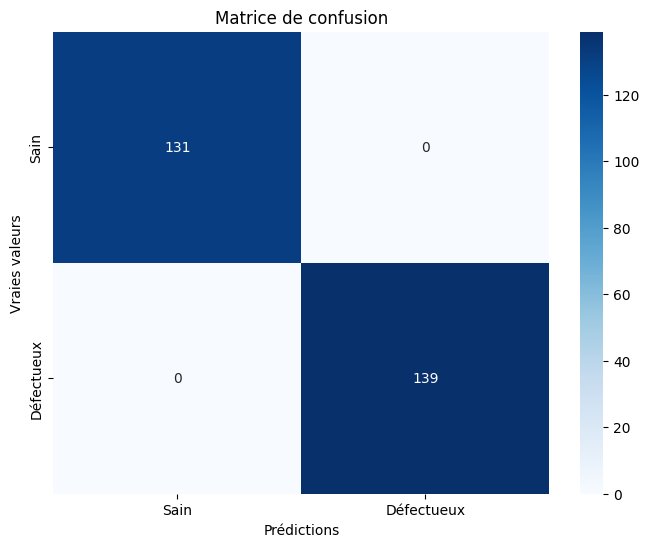


Modèle et scaler sauvegardés dans le dossier 'modeles'


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report)
from sklearn.preprocessing import RobustScaler
import joblib

# 1. Chargement des données
df = pd.read_csv("resultats_statistiques.csv")

# 2. Sélection des caractéristiques
features = ['Moyenne', 'RMS', 'Skewness', 'Kurtosis', 'Valeur Max']
X = df[features]
y = df['Classe numérique']

# 3. Normalisation robuste
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split des données
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# 5. Configuration du modèle
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

# 6. Entraînement
print("Début de l'entraînement...")
model.fit(X_train, y_train)
print("Entraînement terminé!")

# 7. Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 8. Calcul des métriques
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'AUC-ROC': roc_auc_score(y_test, y_proba)
}

# 9. Affichage des résultats
print("\nPerformance du modèle:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2%}")

print("\nRapport de classification détaillé:")
print(classification_report(y_test, y_pred, target_names=["Sain", "Défectueux"]))

# 10. Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Sain", "Défectueux"],
            yticklabels=["Sain", "Défectueux"])
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

# 11. Importance des caractéristiques
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
plt.title("Importance des caractéristiques")
plt.xlabel("Importance relative")
plt.ylabel("Caractéristiques")
plt.show()

# 12. Sauvegarde des artefacts
joblib.dump(model, "modeles/random_forest_model.pkl")
joblib.dump(scaler, "modeles/robust_scaler.pkl")
print("\nModèle et scaler sauvegardés dans le dossier 'modeles'")

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, recall_score,
                            confusion_matrix, classification_report)
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

# 1. Chargement des données
df = pd.read_csv("resultats_statistiques.csv")

# 2. Préparation des données
features = ['Moyenne', 'RMS', 'Skewness', 'Kurtosis', 'Valeur Max']
X = df[features]
y = df['Classe numérique']

# 3. Normalisation
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 4. Séparation entraînement/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# 5. Création de l'arbre avec paramètres optimisés
model = DecisionTreeClassifier(
    max_depth=3,          # Limite la profondeur pour la visualisation
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

# 6. Visualisation de l'arbre
plt.figure(figsize=(20, 12))
plot_tree(
    decision_tree=model,
    feature_names=features,
    class_names=['Sain', 'Défectueux'],
    filled=True,
    rounded=True,
    proportion=True,
    impurity=False,
    label='root',
    fontsize=12
)
plt.title("Arbre de décision pour la détection de défauts vibratoires", fontsize=16)
plt.show()

# 7. Évaluation
y_pred = model.predict(X_test)

print("Performance du modèle:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"Recall: {recall_score(y_test, y_pred):.2%} (Détection des défauts)")
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))
print("\nRapport détaillé:")
print(classification_report(y_test, y_pred, target_names=["Sain", "Défectueux"]))

# 8. Importance des caractéristiques
importance = pd.DataFrame({
    'Caractéristique': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportance des caractéristiques:")
print(importance)

Performance du modèle:
Accuracy: 100.00%
Recall: 100.00% (Détection des défauts)

Matrice de confusion:
[[131   0]
 [  0 139]]

Rapport détaillé:
              precision    recall  f1-score   support

        Sain       1.00      1.00      1.00       131
  Défectueux       1.00      1.00      1.00       139

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270


Importance des caractéristiques:
  Caractéristique  Importance
3        Kurtosis         1.0
0         Moyenne         0.0
1             RMS         0.0
2        Skewness         0.0
4      Valeur Max         0.0


In [48]:
# Assuming 'Classe numérique' is your target variable
X = df[['Moyenne', 'RMS', 'Skewness', 'Kurtosis', 'Valeur Max']]
y = df['Classe numérique']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

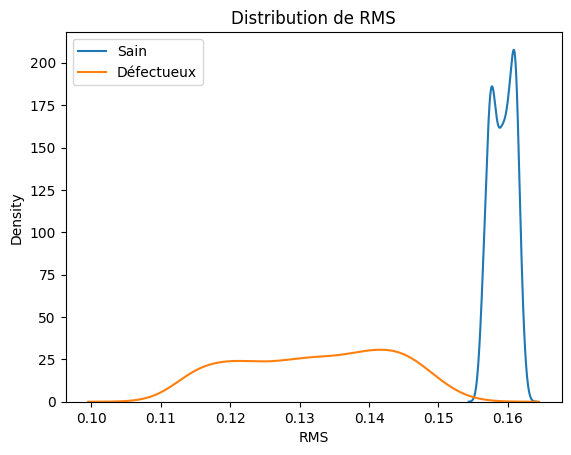

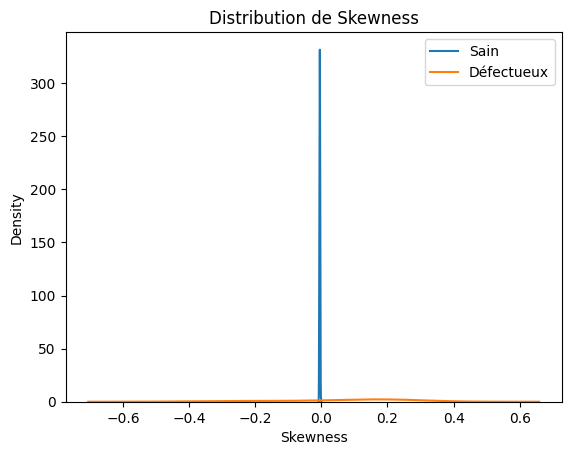

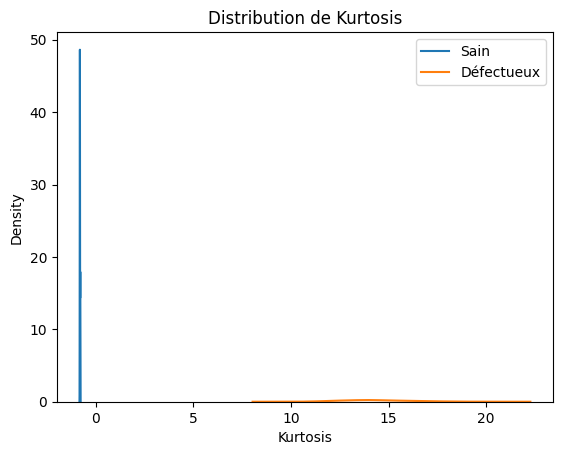

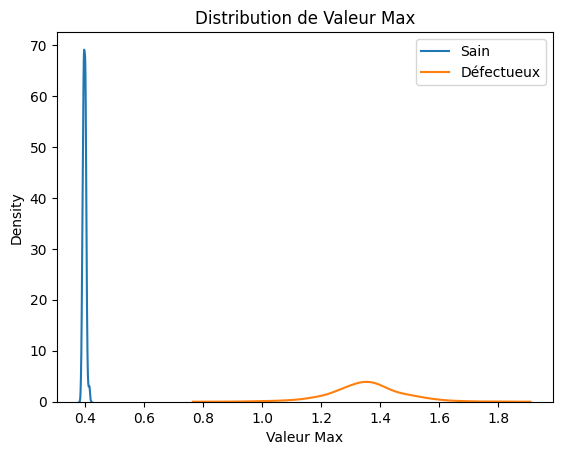

In [49]:
# Vérifier les distributions par classe
for feature in features:
    plt.figure()
    sns.kdeplot(df[df['Classe numérique']==0][feature], label='Sain')
    sns.kdeplot(df[df['Classe numérique']==1][feature], label='Défectueux')
    plt.title(f'Distribution de {feature}')
    plt.legend()

In [50]:
model = RandomForestClassifier(
    n_estimators=100,  # Réduire le nombre d'arbres
    max_depth=5,       # Limiter la profondeur
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='recall')
print(f"Scores de validation croisée : {scores}")
print(f"Moyenne : {scores.mean():.2%} (±{scores.std():.2%})")

Scores de validation croisée : [1. 1. 1. 1. 1.]
Moyenne : 100.00% (±0.00%)


Text(0, 0.5, 'Composante Principale 2')

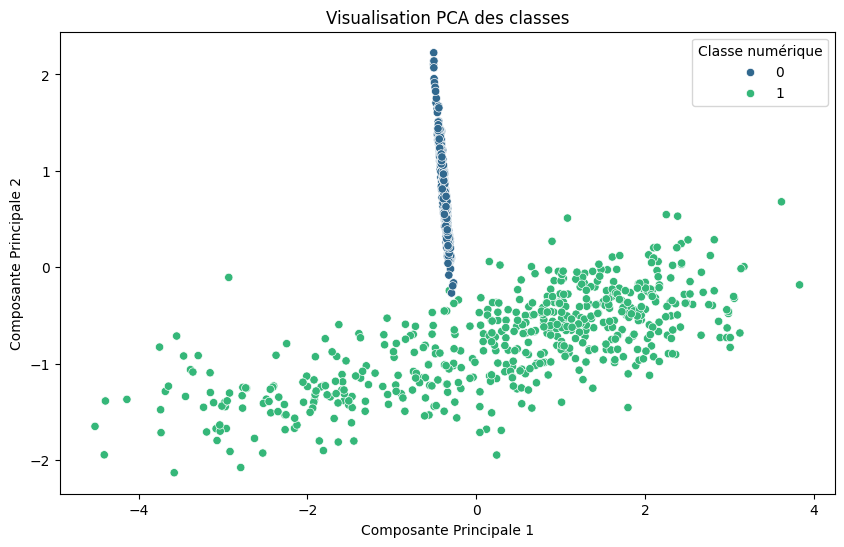

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis')
plt.title('Visualisation PCA des classes')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

In [53]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

Entraînement de la régression logistique...
Entraînement terminé!

Performance de la régression logistique:
Accuracy: 100.00%
Recall: 100.00%
AUC-ROC: 100.00%



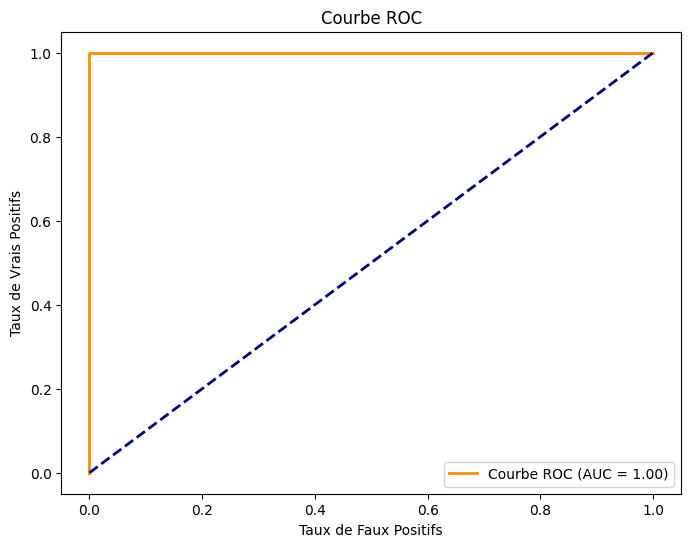


Importance des caractéristiques (coefficients):
      Feature  Coefficient  Importance Absolue
4  Valeur Max     3.608911            3.608911
3    Kurtosis     3.028247            3.028247
1         RMS    -0.783782            0.783782
0     Moyenne     0.000000            0.000000
2    Skewness     0.000000            0.000000


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Rééchantillonnage correct avec scaling après split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  # Utiliser les données brutes
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Scaling basé uniquement sur le train set
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuration avancée avec régularisation
model_lr = LogisticRegression(
    penalty='l1',  # Régularisation L1 pour sélection de features
    solver='saga',  # Meilleur pour la régularisation L1
    C=0.1,  # Inverse de la force de régularisation (plus petit = plus de régularisation)
    max_iter=2000,
    class_weight='balanced',
    random_state=42
)

# Entraînement avec validation croisée
print("Entraînement de la régression logistique...")
model_lr.fit(X_train_scaled, y_train)
print("Entraînement terminé!\n")

# Prédictions et probabilités
y_pred_lr = model_lr.predict(X_test_scaled)
y_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

# Évaluation détaillée
print("Performance de la régression logistique:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2%}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2%}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr):.2%}\n")

# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Sain", "Défectueux"],
            yticklabels=["Sain", "Défectueux"])
plt.title("Matrice de confusion - Régression Logistique")
plt.show()

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Coefficients du modèle
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model_lr.coef_[0],
    'Importance Absolue': np.abs(model_lr.coef_[0])
}).sort_values('Importance Absolue', ascending=False)

print("\nImportance des caractéristiques (coefficients):")
print(coefficients)

**Partie deep learning**

In [57]:
# Split temporel strict (80% premières données pour train)
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Ne PAS utiliser validation_split dans fit() mais créer un vrai val set temporel
val_size = int(0.2 * train_size)
X_train, X_val = X_train[:-val_size], X_train[-val_size:]
y_train, y_val = y_train[:-val_size], y_train[-val_size:]

In [62]:
model = Sequential([
    LSTM(32,
         input_shape=(WINDOW_SIZE, len(features))),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model = Sequential([
    LSTM(32,
         input_shape=(WINDOW_SIZE, len(features))),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [63]:
optimizer = Adam(learning_rate=0.0001)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=[tf.keras.metrics.AUC(name='auc')]  # Seule métrique fiable
)

callbacks = [
    EarlyStopping(monitor='val_auc', patience=10, mode='max',
                 restore_best_weights=True, min_delta=0.01)
]

In [64]:
def augment_sequences(X, y, noise_level=0.05):
    X_noise = X + np.random.normal(0, noise_level, X.shape)
    return np.concatenate([X, X_noise]), np.concatenate([y, y])

Distribution des classes - Train: [ 72 267]
Validation: [84]
Test: [106]
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step


Text(0.5, 1.0, 'Courbe ROC réelle')

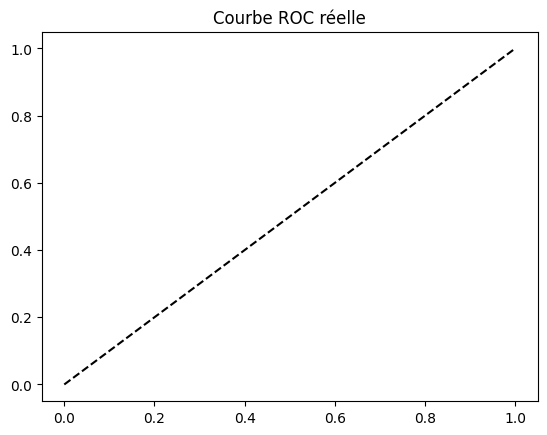

In [65]:
# Avant entraînement
print(f"Distribution des classes - Train: {np.bincount(y_train)}")
print(f"Validation: {np.bincount(y_val)}")
print(f"Test: {np.bincount(y_test)}")

# Après entraînement
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.title('Courbe ROC réelle')

In [69]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# 1. Chargement des données
df = pd.read_csv("resultats_statistiques.csv")
features = ['Moyenne', 'RMS', 'Skewness', 'Kurtosis', 'Valeur Max']
target = 'Classe numérique'

# 2. Normalisation
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[features])
y = df[target].values

# 3. Création des séquences temporelles
def create_sequences(data, targets, window_size=10, step=1):
    X, y = [], []
    for i in range(0, len(data) - window_size, step):
        X.append(data[i:i + window_size])
        y.append(targets[i + window_size - 1])  # Étiquette à la dernière étape
    return np.array(X), np.array(y)

window_size = 15  # Augmenter la fenêtre temporelle
X_seq, y_seq = create_sequences(X_scaled, y, window_size=window_size)

# 4. Split temporel (important pour les séries chronologiques)
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# 5. Architecture LSTM avancée
model = Sequential([
    LSTM(64,
         input_shape=(window_size, len(features)),
         return_sequences=True,
         kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32,
         kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 6. Compilation avec métriques adaptées
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# 7. Callbacks
callbacks = [
    EarlyStopping(monitor='val_auc', patience=15, mode='max', restore_best_weights=True),
    ModelCheckpoint('best_lstm_model.h5', monitor='val_auc', save_best_only=True)
]

# 8. Entraînement
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# 9. Visualisation des performances
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution des Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Évolution de l\'AUC')
plt.legend()
plt.show()


Epoch 1/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7228 - auc: 0.8613 - loss: 1.4308 - precision: 0.8747 - recall: 0.6120

27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.7343 - auc: 0.8697 - loss: 1.4133 - precision: 0.8818 - recall: 0.6284 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 1.2903 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9900 - auc: 0.9957 - loss: 0.8415 - precision: 0.9827 - recall: 1.0000 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 1.0035 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9934 - auc: 0.9923 - loss: 0.6252 - precision: 0.9898 - recall: 1.0000 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.7695 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9979 - auc: 0.9997 - loss: 0.4500 - precision: 0.9968 - recall: 1.0000 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.5806 - val_precision: 0.0000e+00 - val_recall: 0.000

Aperçu des données :
   Classe  Classe numérique       Fichier   Moyenne       RMS  Skewness  \
0     F0                 1  file269.xlsx  0.040551  0.138655  0.235057   
1     F0                 1  file382.xlsx  0.041491  0.120477  0.069756   
2     F0                 1  file151.xlsx  0.039546  0.139501  0.020543   
3     F0                 1  file375.xlsx  0.041027  0.122565  0.120421   
4     F0                 1  file420.xlsx  0.041407  0.121876  0.075157   

    Kurtosis  Valeur Max  
0  13.476795    1.502072  
1  11.792552    1.217458  
2  15.551595    1.400472  
3  13.327490    1.393398  
4  11.555937    1.322412  

Distribution des classes :
 Classe numérique
1    554
0    523
Name: count, dtype: int64

Valeurs manquantes :
 Classe              0
Classe numérique    0
Fichier             0
Moyenne             0
RMS                 0
Skewness            0
Kurtosis            0
Valeur Max          0
dtype: int64
Forme des séquences : X_seq=(1068, 10, 5), y_seq=(1068,)
Train: (854,

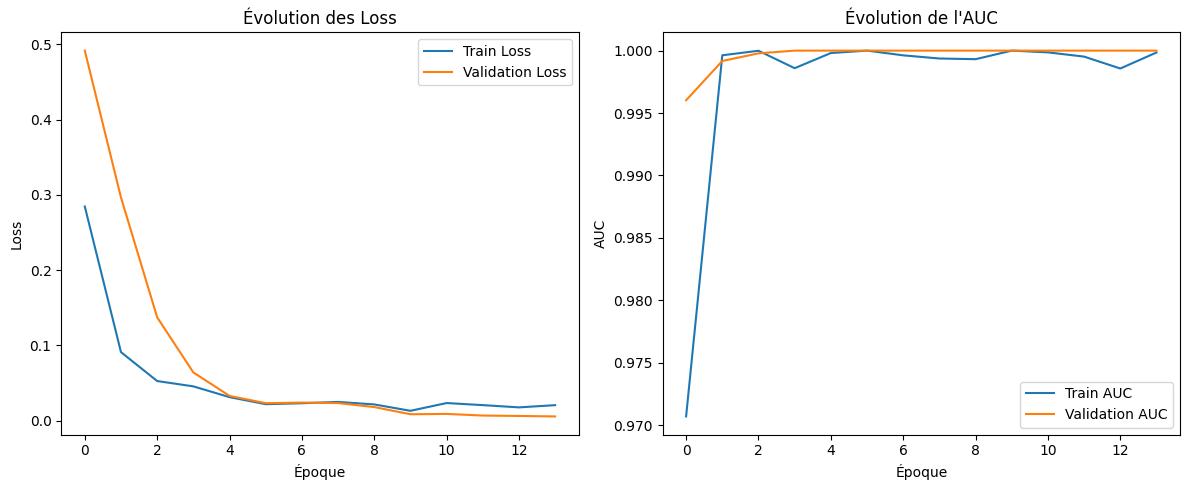

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step

Rapport de classification :
              precision    recall  f1-score   support

        Sain       1.00      0.99      1.00       105
  Défectueux       0.99      1.00      1.00       109

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



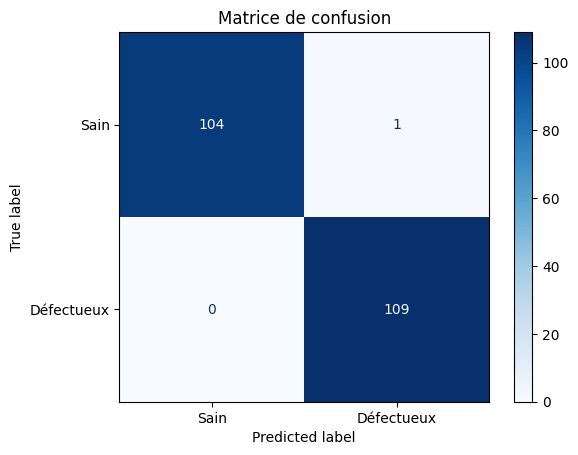

In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay

# -----------------------------------
# 1. Chargement et vérification des données
# -----------------------------------
df = pd.read_csv("resultats_statistiques.csv")
features = ['Moyenne', 'RMS', 'Skewness', 'Kurtosis', 'Valeur Max']
target = 'Classe numérique'

# Vérification initiale
print("Aperçu des données :\n", df.head())
print("\nDistribution des classes :\n", df[target].value_counts())
print("\nValeurs manquantes :\n", df.isnull().sum())

# Gestion des valeurs manquantes
df = df.dropna(subset=features + [target])

# Vérifier que les deux classes sont présentes
if len(np.unique(df[target])) < 2:
    raise ValueError("Le dataset ne contient qu'une seule classe ! Vérifiez vos données.")

# -----------------------------------
# 2. Normalisation
# -----------------------------------
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[features])
y = df[target].values

# Vérifier que y contient uniquement 0 et 1
if not np.all(np.isin(y, [0, 1])):
    raise ValueError("Les étiquettes doivent être 0 ou 1.")

# -----------------------------------
# 3. Création des séquences temporelles
# -----------------------------------
def create_sequences(data, targets, window_size=10, step=1):
    X, y = [], []
    for i in range(0, len(data) - window_size + 1, step):
        X.append(data[i:i + window_size])
        y.append(targets[i + window_size - 1])
    return np.array(X), np.array(y)

window_size = 10
X_seq, y_seq = create_sequences(X_scaled, y, window_size=window_size)
print(f"Forme des séquences : X_seq={X_seq.shape}, y_seq={y_seq.shape}")

# -----------------------------------
# 4. Split train/test (stratifié)
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# Vérifier la distribution des classes
print("Classes dans train :", np.bincount(y_train.astype(int)))
print("Classes dans test :", np.bincount(y_test.astype(int)))

# Vérifier que y_test contient les deux classes
if len(np.unique(y_test)) < 2:
    raise ValueError("L'ensemble de test ne contient qu'une seule classe !")

# -----------------------------------
# 5. Architecture LSTM simplifiée
# -----------------------------------
model = Sequential([
    LSTM(32,
         input_shape=(window_size, len(features)),
         return_sequences=True,
         kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(16),
    BatchNormalization(),
    Dropout(0.2),

    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# -----------------------------------
# 6. Compilation
# -----------------------------------
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# -----------------------------------
# 7. Callbacks
# -----------------------------------
callbacks = [
    EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True),
    ModelCheckpoint('best_lstm_model.keras', monitor='val_auc', save_best_only=True)
]

# -----------------------------------
# 8. Entraînement
# -----------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

# -----------------------------------
# 9. Visualisation des performances
# -----------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution des Loss')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Évolution de l\'AUC')
plt.xlabel('Époque')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------
# 10. Évaluation finale
# -----------------------------------
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_binary, target_names=["Sain", "Défectueux"]))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_binary)
ConfusionMatrixDisplay(cm, display_labels=["Sain", "Défectueux"]).plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()

Aperçu des données :
   Classe  Classe numérique       Fichier   Moyenne       RMS  Skewness  \
0     F0                 1  file269.xlsx  0.040551  0.138655  0.235057   
1     F0                 1  file382.xlsx  0.041491  0.120477  0.069756   
2     F0                 1  file151.xlsx  0.039546  0.139501  0.020543   
3     F0                 1  file375.xlsx  0.041027  0.122565  0.120421   
4     F0                 1  file420.xlsx  0.041407  0.121876  0.075157   

    Kurtosis  Valeur Max  
0  13.476795    1.502072  
1  11.792552    1.217458  
2  15.551595    1.400472  
3  13.327490    1.393398  
4  11.555937    1.322412  

Distribution des classes :
 Classe numérique
1    554
0    523
Name: count, dtype: int64

Valeurs manquantes :
 Classe              0
Classe numérique    0
Fichier             0
Moyenne             0
RMS                 0
Skewness            0
Kurtosis            0
Valeur Max          0
dtype: int64
Forme des séquences : X_seq=(1068, 10, 5), y_seq=(1068,)
Train: (854,

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 32)          │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 16)          │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,545 (9.94 KB)

 Trainable params: 2,449 (9.57 KB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.7858 - auc: 0.8498 - loss: 0.4944 - precision: 0.8636 - recall: 0.6816 - val_accuracy: 0.9953 - val_auc: 0.9991 - val_loss: 0.3227 - val_precision: 0.9909 - val_recall: 1.0000
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9807 - auc: 0.9966 - loss: 0.1529 - precision: 0.9913 - recall: 0.9712 - val_accuracy: 0.9953 - val_auc: 0.9988 - val_loss: 0.1584 - val_precision: 0.9909 - val_recall: 1.0000
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9869 - auc: 0.9979 - loss: 0.0789 - precision: 0.9854 - recall: 0.9912 - val_accuracy: 0.9953 - val_auc: 0.9989 - val_loss: 0.0855 - val_precision: 0.9909 - val_recall: 1.0000
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9914 - auc: 0.9996 - loss: 0.0481 - precision: 0.9828 - recall: 1.0000 - val_accuracy: 0.9953 - val_auc: 0.9991 - val_loss: 0.0496 - val_precision: 0.9909 - val_recall: 1.0000
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━

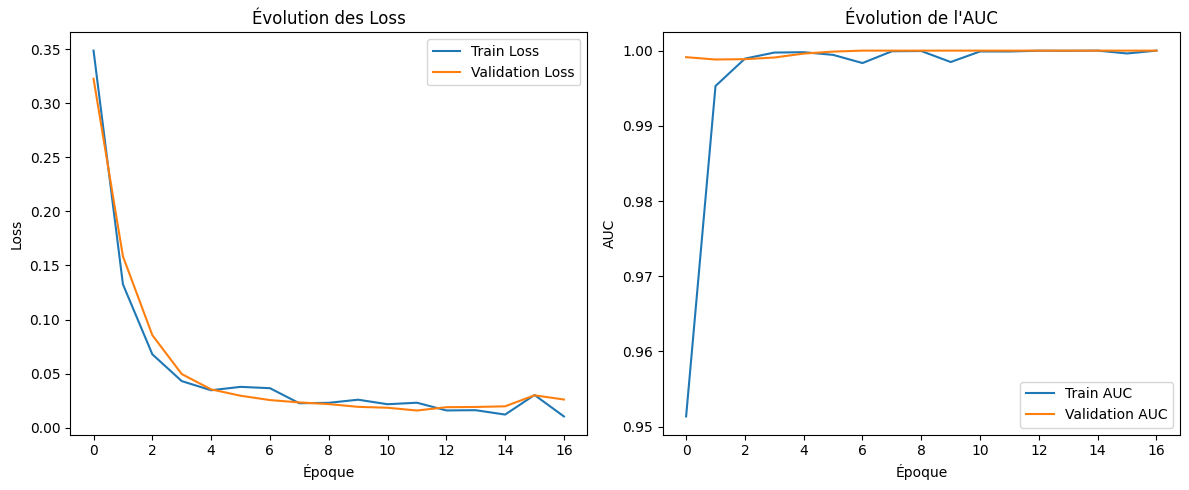

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Rapport de classification :
              precision    recall  f1-score   support

        Sain       1.00      0.99      1.00       105
  Défectueux       0.99      1.00      1.00       109

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



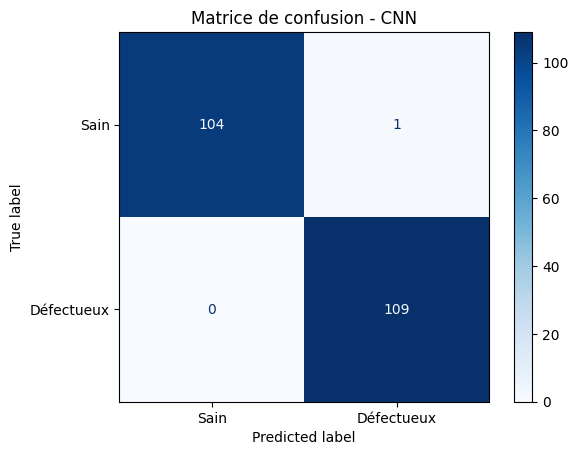

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# -----------------------------------
# 1. Chargement et vérification des données
# -----------------------------------
df = pd.read_csv("resultats_statistiques.csv")
features = ['Moyenne', 'RMS', 'Skewness', 'Kurtosis', 'Valeur Max']
target = 'Classe numérique'

# Vérification initiale
print("Aperçu des données :\n", df.head())
print("\nDistribution des classes :\n", df[target].value_counts())
print("\nValeurs manquantes :\n", df.isnull().sum())

# Gestion des valeurs manquantes
df = df.dropna(subset=features + [target])

# Vérifier que les deux classes sont présentes
if len(np.unique(df[target])) < 2:
    raise ValueError("Le dataset ne contient qu'une seule classe ! Vérifiez vos données.")

# -----------------------------------
# 2. Normalisation
# -----------------------------------
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[features])
y = df[target].values

# Vérifier que y contient uniquement 0 et 1
if not np.all(np.isin(y, [0, 1])):
    raise ValueError("Les étiquettes doivent être 0 ou 1.")

# -----------------------------------
# 3. Création des séquences temporelles
# -----------------------------------
def create_sequences(data, targets, window_size=10, step=1):
    X, y = [], []
    for i in range(0, len(data) - window_size + 1, step):
        X.append(data[i:i + window_size])
        y.append(targets[i + window_size - 1])  # Étiquette à la fin de la séquence
    return np.array(X), np.array(y)

window_size = 10  # Taille de la fenêtre pour les séquences
X_seq, y_seq = create_sequences(X_scaled, y, window_size=window_size)
print(f"Forme des séquences : X_seq={X_seq.shape}, y_seq={y_seq.shape}")

# -----------------------------------
# 4. Split train/test (stratifié)
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# Vérifier la distribution des classes
print("Classes dans train :", np.bincount(y_train.astype(int)))
print("Classes dans test :", np.bincount(y_test.astype(int)))

# Vérifier que y_test contient les deux classes
if len(np.unique(y_test)) < 2:
    raise ValueError("L'ensemble de test ne contient qu'une seule classe !")

# -----------------------------------
# 5. Architecture CNN 1D
# -----------------------------------
model = Sequential([
    # Première couche de convolution
    Conv1D(filters=32, kernel_size=3, activation='relu',
           input_shape=(window_size, len(features)),
           kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # Deuxième couche de convolution
    Conv1D(filters=16, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # Aplatir pour les couches denses
    Flatten(),

    # Couche dense
    Dense(16, activation='relu'),
    Dropout(0.2),

    # Couche de sortie
    Dense(1, activation='sigmoid')
])

# -----------------------------------
# 6. Compilation
# -----------------------------------
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Afficher le résumé du modèle
model.summary()

# -----------------------------------
# 7. Callbacks
# -----------------------------------
callbacks = [
    EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True),
    ModelCheckpoint('best_cnn_model.keras', monitor='val_auc', save_best_only=True)
]

# -----------------------------------
# 8. Entraînement
# -----------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

# -----------------------------------
# 9. Visualisation des performances
# -----------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution des Loss')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Évolution de l\'AUC')
plt.xlabel('Époque')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------
# 10. Évaluation finale
# -----------------------------------
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_binary, target_names=["Sain", "Défectueux"]))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_binary)
ConfusionMatrixDisplay(cm, display_labels=["Sain", "Défectueux"]).plot(cmap="Blues")
plt.title("Matrice de confusion - CNN")
plt.show()

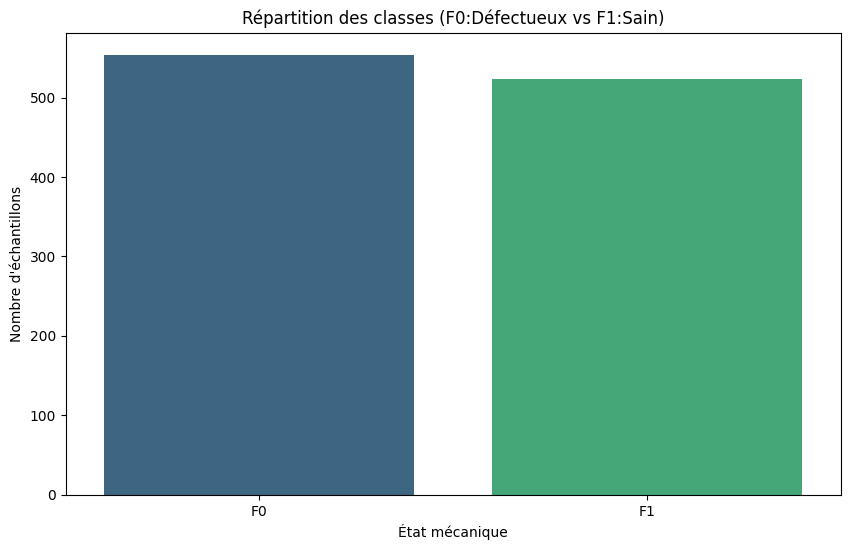

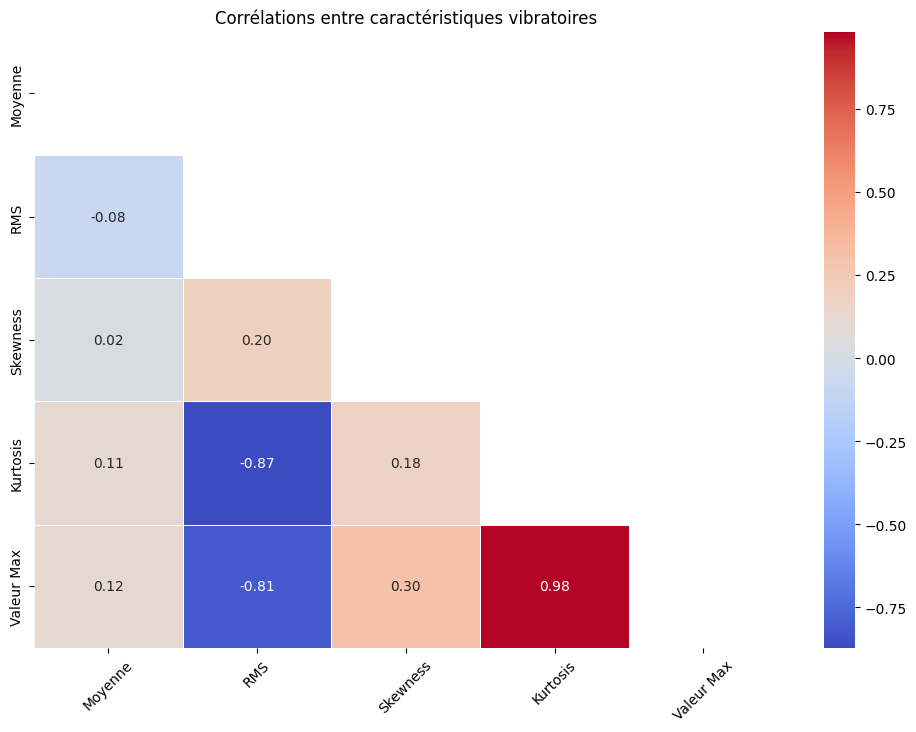

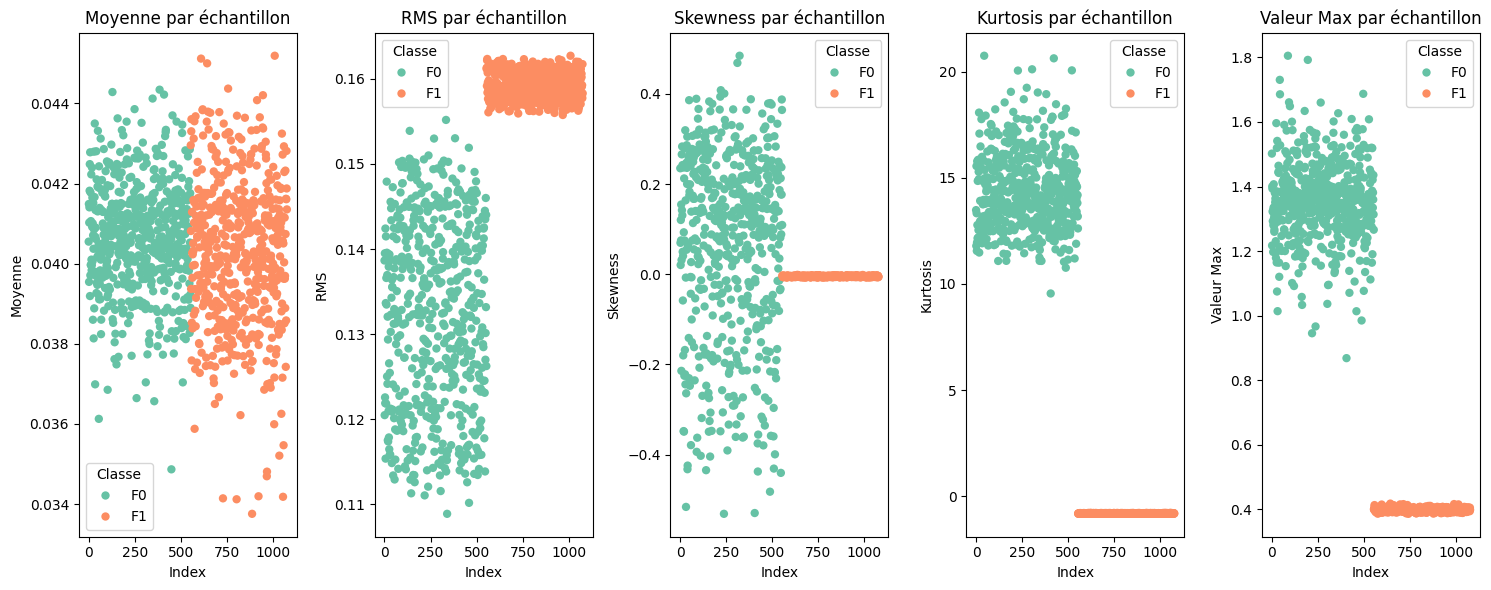

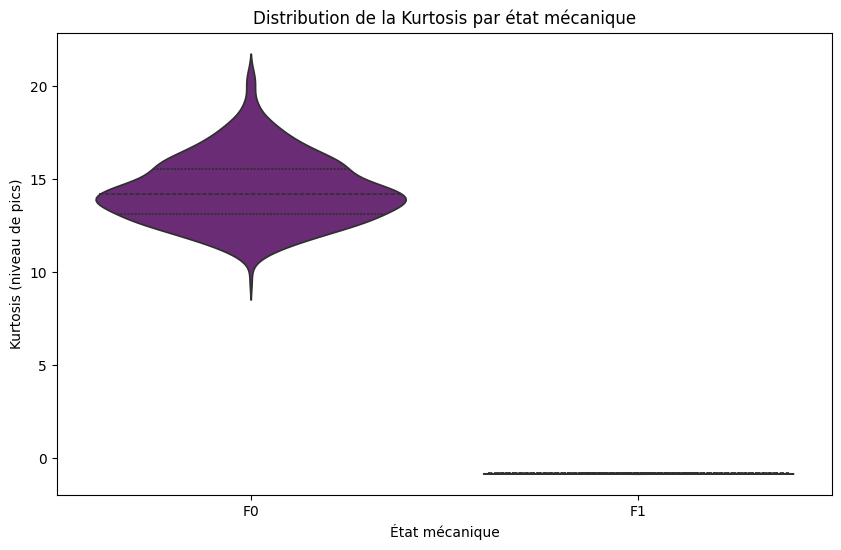

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les résultats
results_df = pd.read_csv("resultats_statistiques.csv")

# 1. Distribution des classes
plt.figure(figsize=(10, 6))
sns.countplot(x='Classe', data=results_df, palette='viridis')
plt.title('Répartition des classes (F0:Défectueux vs F1:Sain)')
plt.xlabel('État mécanique')
plt.ylabel('Nombre d\'échantillons')
plt.show()

# 2. Distribution des caractéristiques par classe
features = ['Moyenne', 'RMS', 'Skewness', 'Kurtosis', 'Valeur Max']

plt.figure(figsize=(18, 12))
for i, feat in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Classe', y=feat, data=results_df, palette='coolwarm')
    plt.title(f'Distribution de {feat}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# 3. Matrice de corrélation des caractéristiques
plt.figure(figsize=(12, 8))
corr_matrix = results_df[features].corr()
sns.heatmap(corr_matrix,
           annot=True,
           fmt=".2f",
           cmap='coolwarm',
           mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
           linewidths=0.5)
plt.title('Corrélations entre caractéristiques vibratoires')
plt.xticks(rotation=45)
plt.show()

# 4. Analyse multivariée
sns.pairplot(results_df[features + ['Classe']],
            hue='Classe',
            palette='husl',
            plot_kws={'alpha':0.6, 'edgecolor':'k'},
            diag_kind='kde')
plt.suptitle('Relations multivariées entre caractéristiques', y=1.02)
plt.show()

# 5. Analyse des valeurs extrêmes
plt.figure(figsize=(15, 6))
for i, feat in enumerate(features, 1):
    plt.subplot(1, 5, i)
    sns.scatterplot(x=results_df.index,
                   y=results_df[feat],  # Pass the column data for y
                   hue=results_df['Classe'],
                   palette='Set2',
                   edgecolor='none')
    plt.title(f'{feat} par échantillon')
    plt.xlabel('Index')
plt.tight_layout()
plt.show()

# 6. Analyse de la kurtosis (indicateur clé de chocs mécaniques)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Classe', y='Kurtosis', data=results_df, inner='quartile', palette='magma')
plt.title('Distribution de la Kurtosis par état mécanique')
plt.xlabel('État mécanique')
plt.ylabel('Kurtosis (niveau de pics)')
plt.show()

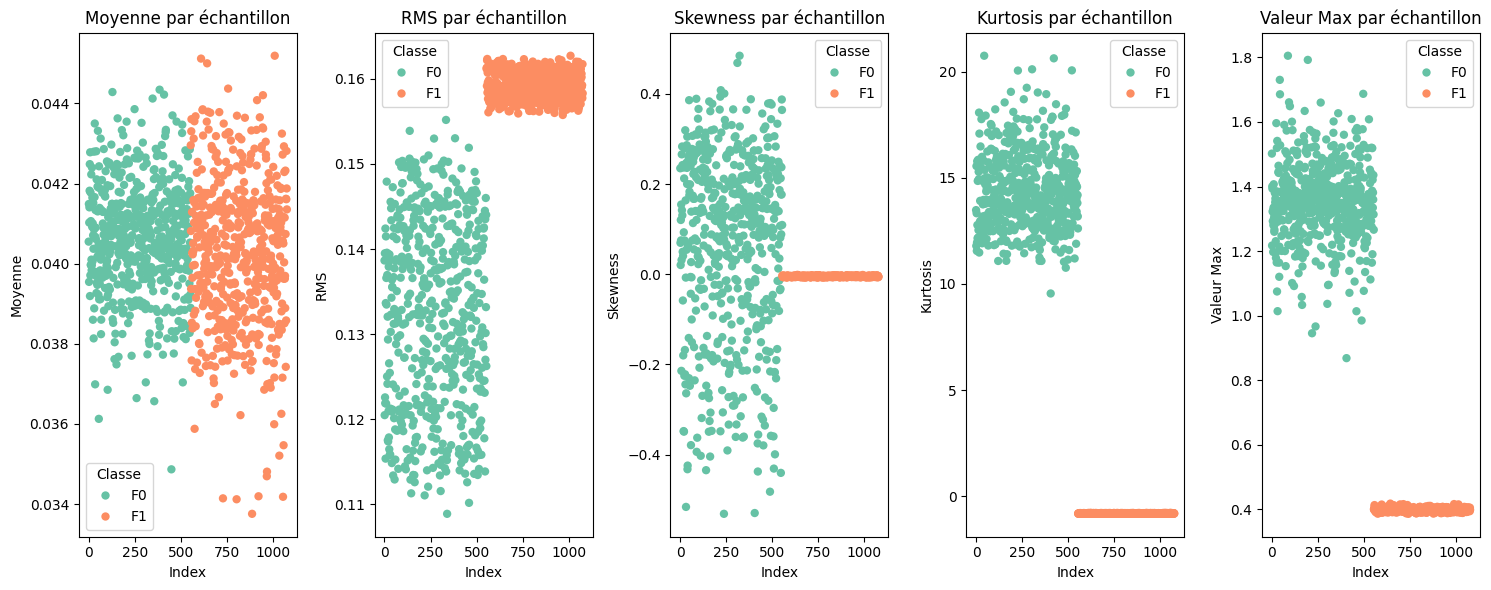

In [79]:
# 5. Analyse des valeurs extrêmes
plt.figure(figsize=(15, 6))
for i, feat in enumerate(features, 1):
    plt.subplot(1, 5, i)
    sns.scatterplot(x=results_df.index,
                   y=results_df[feat],  # Pass the column data for y
                   hue=results_df['Classe'],
                   palette='Set2',
                   edgecolor='none')
    plt.title(f'{feat} par échantillon')
    plt.xlabel('Index')
plt.tight_layout()
plt.show()